<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Tutorial/Getting_started_TensorFlow2/Saving_loading_models/Saving_Loading_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%%writefile pip_install.sh
#!/bin/bash
pip install --no-cache-dir -U pip wheel
pip install --no-cache-dir -U numpy pandas matplotlib seaborn
pip install --no-cache-dir -U scikit-learn
pip install --no-cache-dir -U tensorflow_hub
pip check

Overwriting pip_install.sh


In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


# Saving and loading models

 ## Coding tutorials
 #### [1. Saving and loading model weights](#coding_tutorial_1)
 #### [2. Model saving criteria](#coding_tutorial_2)
 #### [3. Saving the entire model](#coding_tutorial_3)
 #### [4. Loading pre-trained Keras models](#coding_tutorial_4)
 #### [5. Tensorflow Hub modules](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Saving and loading model weights

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(10, )),
    Dense(1)
])
model.compile(
    optimizer='sgd',
    loss=BinaryCrossentropy(from_logits=True)
)
checkpoint = ModelCheckpoint('my_model', 
    save_weights_only=True)
# checkpoint
# my_model.data-00000-of-00001
# my_model.index

checkpoint = ModelCheckpoint('keras_model.h5',
    save_weights_only=True)
# keras_model.h5

model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint])

model.load_weights('my_model')
model.load_weights('keras_model.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layes import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(10, )),
    Dense(1)
])
model.compile(
    optimizer='sgd', 
    loss='mse',
    metrics=['mae']
)
early_stopping =  EarlyStopping(monitor='val_mae', patience=2)

model.fit(X_train, y_train, validation_split=0.2, 
    epochs=50, callbacks=[early_stopping])

model.save_weights('my_model')

#### Load and inspect CIFAR-10 dataset

The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
# Import the CIFAR-10 dataset and rescale the pixel values
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

170498071/170498071 [==============================] - 18s 0us/step


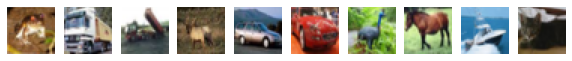

In [4]:
# Plot the first 10 CIFAR-10 images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])
plt.show()

#### Introduce two useful functions

In [3]:
# Introduce function to test model accuracy
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [4]:
# Introduce function that creates a new instance of a simple CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
            activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
            name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

#### Create simple convolutional neural network classifier

In [8]:
# Create an instance of the model and show model summary
model = get_new_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14,514
Trainable params: 14,514
Non-trai

In [9]:
# Test accuracy of the untrained model, around 10% (random)
get_test_accuracy(model, x_test, y_test)

2022-07-18 00:04:06.423606: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


accuracy: 0.092


#### Train model with checkpoints

In [10]:
# Create Tensorflow checkpoint object
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
    frequency='epoch', save_weights_only=True, verbose=1)

In [11]:
# Fit model, with simple checkpoint which saves (and overwrites) 
# model weights every epoch
model.fit(x=x_train, y=y_train, epochs=3, callbacks=[checkpoint])

Epoch 1/3
313/313 [==============================] - ETA: 0s - loss: 2.0323 - accuracy: 0.2581
Epoch 1: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 2s 5ms/step - loss: 2.0323 - accuracy: 0.2581
Epoch 2/3
303/313 [============================>.] - ETA: 0s - loss: 1.6385 - accuracy: 0.4147
Epoch 2: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 1s 5ms/step - loss: 1.6331 - accuracy: 0.4159
Epoch 3/3
305/313 [============================>.] - ETA: 0s - loss: 1.4535 - accuracy: 0.4861
Epoch 3: saving model to model_checkpoints/checkpoint
313/313 [==============================] - 1s 5ms/step - loss: 1.4542 - accuracy: 0.4851


In [12]:
# Have a look at what the checkpoint creates
! ls -lh model_checkpoints

total 184K
-rw-r--r-- 1 root root   77 Jul 18 00:15 checkpoint
-rw-r--r-- 1 root root 174K Jul 18 00:15 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul 18 00:15 checkpoint.index


In [13]:
# Evaluate the performance of the trained model
get_test_accuracy(model, x_test, y_test)

accuracy: 0.433


#### Create new model, load weights

In [14]:
# Create a new instance of the (initialised) model, 
# accuracy around 10% again
model = get_new_model()
get_test_accuracy(model, x_test, y_test)

accuracy: 0.096


In [15]:
# Load weights -- accuracy is the same as the trained model
model.load_weights(checkpoint_path)
get_test_accuracy(model, x_test, y_test)

accuracy: 0.433


#### Clear directory

In [16]:
! rm -r model_checkpoints

***
<a id="coding_tutorial_2"></a>
## Model saving criteria

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc', 'mae']
)
checkpoint = ModelCheckpoint('training_run_1/my_model.{epoch}-{val_loss:.4f}',
    save_weights_only=True, save_freq='epoch',
    save_best_only=True, monitor='val_acc', mode='max'
)
model.fit(X_train, y_train, validation_data=(X_val, y_val),
    epochs=10, batch_size=16, callbacks=[checkpoint]
)

#### Create more customised checkpoint

In [5]:
# Create Tensorflow checkpoint object with epoch and batch details
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_1000_path = \
    'model_checkpoints_1000/checkpoint_{epoch:02d}_{batch:04d}'
checkpoint_1000 = ModelCheckpoint(filepath=checkpoint_1000_path,
    save_weights_only=True, save_freq=1000, verbose=1)

In [6]:
# Create and fit model with checkpoint
model = get_new_model()
model.fit(x=x_train, y=y_train, epochs=3, batch_size=10, 
    validation_data=(x_test, y_test), callbacks=[checkpoint_1000])

2022-07-26 00:43:55.833652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 00:43:55.845246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 00:43:55.845688: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 00:43:55.846828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/3


2022-07-26 00:43:57.471375: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


 986/1000 [============================>.] - ETA: 0s - loss: 1.8785 - accuracy: 0.3028
Epoch 1: saving model to model_checkpoints_1000/checkpoint_01_1000
1000/1000 [==============================] - 6s 5ms/step - loss: 1.8751 - accuracy: 0.3048 - val_loss: 1.5848 - val_accuracy: 0.4380
Epoch 2/3
 987/1000 [============================>.] - ETA: 0s - loss: 1.5201 - accuracy: 0.4522
Epoch 2: saving model to model_checkpoints_1000/checkpoint_02_1000
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5175 - accuracy: 0.4537 - val_loss: 1.4545 - val_accuracy: 0.4790
Epoch 3/3
 999/1000 [============================>.] - ETA: 0s - loss: 1.3862 - accuracy: 0.5009
Epoch 3: saving model to model_checkpoints_1000/checkpoint_03_1000
1000/1000 [==============================] - 5s 5ms/step - loss: 1.3866 - accuracy: 0.5009 - val_loss: 1.4012 - val_accuracy: 0.5050


In [7]:
# Have a look at what the checkpoint creates
! ls -lh model_checkpoints_1000

total 544K
-rw-r--r-- 1 root root   93 Jul 26 00:44 checkpoint
-rw-r--r-- 1 root root 174K Jul 26 00:44 checkpoint_01_1000.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul 26 00:44 checkpoint_01_1000.index
-rw-r--r-- 1 root root 174K Jul 26 00:44 checkpoint_02_1000.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul 26 00:44 checkpoint_02_1000.index
-rw-r--r-- 1 root root 174K Jul 26 00:44 checkpoint_03_1000.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul 26 00:44 checkpoint_03_1000.index


#### Work with model saving criteria

In [8]:
# Use tiny training and test set -- will overfit!
x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

In [9]:
# Create a new instance of untrained model
model = get_new_model()

In [10]:
# Create Tensorflow checkpoint object which monitors the validation accuracy
checkpoint_best_path = 'model_checkpoints_best/checkpoint'
checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
    save_weights_only=True, save_freq='epoch', monitor='val_accuracy',
    save_best_only=True, verbose=1)

In [11]:
# Fit the model and save only the weights with the highest validation accuracy
history = model.fit(x=x_train, y=y_train, epochs=50, 
    validation_data=(x_test, y_test), batch_size=10, 
    callbacks=[checkpoint_best], verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to model_checkpoints_best/checkpoint

Epoch 2: val_accuracy did not improve from 0.10000

Epoch 3: val_accuracy did not improve from 0.10000

Epoch 4: val_accuracy did not improve from 0.10000

Epoch 5: val_accuracy did not improve from 0.10000

Epoch 6: val_accuracy did not improve from 0.10000

Epoch 7: val_accuracy did not improve from 0.10000

Epoch 8: val_accuracy did not improve from 0.10000

Epoch 9: val_accuracy did not improve from 0.10000

Epoch 10: val_accuracy did not improve from 0.10000

Epoch 11: val_accuracy did not improve from 0.10000

Epoch 12: val_accuracy improved from 0.10000 to 0.12000, saving model to model_checkpoints_best/checkpoint

Epoch 13: val_accuracy did not improve from 0.12000

Epoch 14: val_accuracy improved from 0.12000 to 0.13000, saving model to model_checkpoints_best/checkpoint

Epoch 15: val_accuracy did not improve from 0.13000

Epoch 16: val_accuracy improved from 0.13000 to 0.1

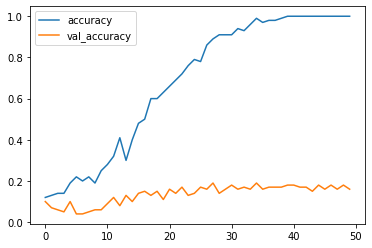

In [13]:
# Plot training and testing curves
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])
plt.show()

In [14]:
# Inspect the checkpoint directory
! ls -lh model_checkpoints_best

total 184K
-rw-r--r-- 1 root root   77 Jul 26 01:00 checkpoint
-rw-r--r-- 1 root root 174K Jul 26 01:00 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul 26 01:00 checkpoint.index


In [15]:
# Create a new model with the saved weights
new_model = get_new_model()
new_model.load_weights(checkpoint_best_path)
get_test_accuracy(new_model, x_test, y_test)

accuracy: 0.190


#### Clear directory

In [16]:
! rm -r model_checkpoints_1000 model_checkpoints_best

***
<a id="coding_tutorial_3"></a>
## Saving the entire model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc', 'mae']
)
checkpoint = ModelCheckpoint('my_model', 
    save_weights_only=False
)
model.fit(X_train, y_train, 
    epochs=10, callbacks=[checkpoint]
)

# my_model/assests/
# my_model/saved_model.pb
# my_model/variables/variables.data-00000-of-00001
# my_model/variables/variables.index

checkpoint = ModelCheckpoint('keras_model.h5',
    save_weights_only=False
)
model.fit(X_train, y_train, 
    epochs=10, callbacks=[checkpoint]
)

# keras_model.h5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc', 'mae']
)
model.fit(X_train, y_train, 
    epochs=10
)
model.save('my_model') # SavedModel format

model.save('keras_model.h5') # HDF5 format

In [ ]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model')
new_keras_model = load_model('keras_model.h5')

new_model.summary()
new_model.fit(X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=20, batch_size=16
)
new_model.evaluate(X_test, y_test)
new_model.predict(X_samples)

#### Create checkpoint that saves whole model, not just weights

In [6]:
# Create Tensorflow checkpoint object
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'model_checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
    save_weights_only=False, frequency='epoch', verbose=1)

In [8]:
# Create and fit model with checkpoint
model = get_new_model()
model.fit(x=x_train, y=y_train, 
    epochs=3, callbacks=[checkpoint])

Epoch 1/3
308/313 [============================>.] - ETA: 0s - loss: 2.0623 - accuracy: 0.2429
Epoch 1: saving model to model_checkpoints


INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


313/313 [==============================] - 2s 7ms/step - loss: 2.0585 - accuracy: 0.2443
Epoch 2/3
312/313 [============================>.] - ETA: 0s - loss: 1.7004 - accuracy: 0.3834
Epoch 2: saving model to model_checkpoints


INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


313/313 [==============================] - 2s 6ms/step - loss: 1.6998 - accuracy: 0.3838
Epoch 3/3
310/313 [============================>.] - ETA: 0s - loss: 1.5410 - accuracy: 0.4427
Epoch 3: saving model to model_checkpoints


INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


313/313 [==============================] - 2s 7ms/step - loss: 1.5415 - accuracy: 0.4426


#### Inspect what the checkpoint has created

In [9]:
# Have a look at what the checkpoint creates
! ls -lh model_checkpoints

total 148K
drwxr-xr-x 2 root root 4.0K Jul 26 23:45 assets
-rw-r--r-- 1 root root  14K Jul 26 23:48 keras_metadata.pb
-rw-r--r-- 1 root root 123K Jul 26 23:48 saved_model.pb
drwxr-xr-x 2 root root 4.0K Jul 26 23:48 variables


In [10]:
# Enter variables directory
! ls -lh model_checkpoints/variables

total 184K
-rw-r--r-- 1 root root 179K Jul 26 23:48 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Jul 26 23:48 variables.index


In [11]:
# Get the model's test accuracy
get_test_accuracy(model, x_test, y_test)

accuracy: 0.445


#### Create new model from scratch

In [12]:
# Delete model
del model

In [13]:
# Reload model from scratch
from tensorflow.keras.models import load_model

model = load_model(checkpoint_path)
get_test_accuracy(model, x_test, y_test)

accuracy: 0.445


#### Use the .h5 format to save model

In [14]:
# Save the model in .h5 format
model.save('my_model.h5')

In [15]:
# Inspect .h5 file
! ls -lh my_model.h5

-rw-r--r-- 1 root root 78K Jul 26 23:56 my_model.h5


In [16]:
# Delete model
del model

In [17]:
# Reload model from scratch
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')
get_test_accuracy(model, x_test, y_test)

accuracy: 0.445


#### Clear directory

In [18]:
! rm -r model_checkpoints
! rm my_model.h5

***
<a id="coding_tutorial_4"></a>
## Loading pre-trained Keras models

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet', include_top=True)

img_input = image.load_img('my_picture.jpg',
    target_size=(224, 224))
img_input = image.img_to_array(img_input)
img_input = preprocess_input(
    img_input[np.newaxis, ...])

preds = model.predict(img_input)
# List of (class, description, probability)
decoded_predictions = decode_predictions(preds, top=3)[0]

#### Import and build Keras ResNet50 model

Today we'll be using the ResNet50 model designed by a team at Microsoft Research, available through Keras applications. Please see the description on the [Keras applications page](https://keras.io/applications/#resnet) for details. If you continue using it, please cite it properly! The paper it comes from is:

Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. "Deep Residual Learning for Image Recognition", 2015.

This model takes a long time to download on the Coursera platform, so it is pre-downloaded in your workspace and saved in Keras HDF5 format. If you want to import it on your personal machine, use the following code:

```python
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')
```

In this coding tutorial, you will instead load the model from disk.

In [2]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')
model.save('models/Keras_ResNet50.h5')
del model

2022-07-28 00:14:16.457687: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 00:14:16.504012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 00:14:16.504234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 00:14:16.505164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

102967424/102967424 [==============================] - 8s 0us/step


In [3]:
# Build Keras ResNet50 model

from tensorflow.keras.models import load_model
model = load_model('models/Keras_ResNet50.h5')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

#### Import and preprocess 3 sample images

In [4]:
# Retrieve the image files
import os
os.makedirs('./data', exist_ok=True)

! wget -qO ./data/lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
! wget -qO ./data/viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
! wget -qO ./data/water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [5]:
# Import 3 sample ImageNet images
from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('data/lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('data/viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('data/water_tower.jpg', target_size=(224, 224))

#### Use ResNet50 model to classify images

In [6]:
# Useful function: presents top 5 predictions and probabilities
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(
        columns=['prediction', 'probability'],
        index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

##### Image 1: lemon

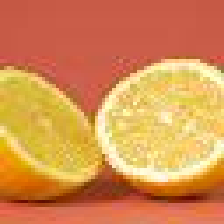

In [7]:
# Display image
lemon_img

In [8]:
# Display top 5 predictions
get_top_5_predictions(lemon_img)

2022-07-28 00:25:22.150496: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


35363/35363 [==============================] - 0s 0us/step


,prediction,probability
1,consomme,0.237065
2,eggnog,0.226407
3,lemon,0.199256
4,face_powder,0.030634
5,ladle,0.030447


##### Image 2: viaduct

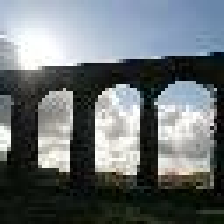

In [9]:
# Display image
viaduct_img

In [10]:
# Display top 5 predictions
get_top_5_predictions(viaduct_img)

1/1 [==============================] - 0s 35ms/step


,prediction,probability
1,vault,0.433361
2,viaduct,0.113641
3,prison,0.107957
4,window_screen,0.067979
5,megalith,0.016871


##### Image 3: water tower

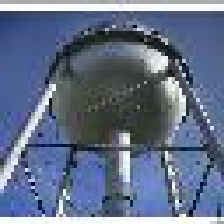

In [11]:
# Display image
water_tower_img

In [12]:
# Display top 5 predictions
get_top_5_predictions(water_tower_img)

1/1 [==============================] - 0s 36ms/step


,prediction,probability
1,solar_dish,0.483133
2,ladle,0.165878
3,planetarium,0.101512
4,strainer,0.052545
5,jigsaw_puzzle,0.023844


***
<a id="coding_tutorial_5"></a>
## Tensorflow Hub modules

#### Import and build Tensorflow Hub MobileNet v1 model

Today we'll be using Google's MobileNet v1 model, available on Tensorflow Hub. Please see the description on the [Tensorflow Hub page](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4) for details on it's architecture, how it's trained, and the reference. If you continue using it, please cite it properly! The paper it comes from is:

Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam: "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications", 2017.

This model takes a long time to download on the Coursera platform, so it is pre-downloaded in your workspace and saved in Tensorflow SavedModel format. If you want to import it on your personal machine, use the following code:

```python
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
```

In this coding tutorial, you will instead load the model directly from disk.

In [2]:
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential

module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
model.save('models/Tensorflow_MobileNet_v1')
del model

2022-07-28 01:07:41.926079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 01:07:41.930977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 01:07:41.931212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 01:07:41.932409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

INFO:tensorflow:Assets written to: models/Tensorflow_MobileNet_v1/assets


INFO:tensorflow:Assets written to: models/Tensorflow_MobileNet_v1/assets


In [3]:
# Build Google's Mobilenet v1 model
import tensorflow_hub as hub
from tensorflow.keras.models import load_model, Sequential

module = load_model('models/Tensorflow_MobileNet_v1')
model = Sequential([hub.KerasLayer(module)])
model.build(input_shape=[None, 160, 160, 3])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              1343049   
                                                                 
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


#### Use MobileNet model to classify images

In [ ]:
# Import and preprocess 3 sample ImageNet images
lemon_img = load_img("data/lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("data/viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("data/water_tower.jpg", target_size=(160, 160))

In [ ]:
# Read in categories text file
! wget -qO data/imagenet_categories.txt "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

with open('data/imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [ ]:
# Useful function: presents top 5 predictions
def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
        top_preds.loc[i+1, 'probability'] = preds[0][sorted_index[i]] / 100.
    return top_preds

##### Image 1: lemon

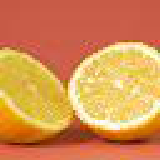

In [ ]:
lemon_img

In [ ]:
get_top_5_predictions(lemon_img)

,prediction,probability
1,shower cap,0.125483
2,tray,0.0992529
3,candle,0.0958033
4,brassiere,0.0933336
5,African chameleon,0.0919389


##### Image 2: viaduct

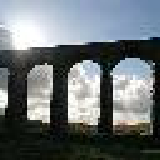

In [ ]:
viaduct_img

In [ ]:
get_top_5_predictions(viaduct_img)

,prediction,probability
1,viaduct,0.116364
2,pier,0.0991802
3,dam,0.0956224
4,prison,0.0929935
5,solar dish,0.0929143


##### Image 3: water tower

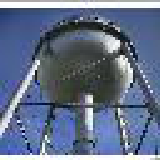

In [ ]:
water_tower_img

In [ ]:
get_top_5_predictions(water_tower_img)

,prediction,probability
1,solar dish,0.0920385
2,water tower,0.0903942
3,aircraft carrier,0.0853889
4,jigsaw puzzle,0.0832841
5,oxygen mask,0.0818192
